In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_csv("NewestDataset.csv").dropna()
data["profit_cat"] = data["profit"].apply(lambda x: "pos" if x > 0 else "neg")
data = data[data["call_put"] == "Call"]

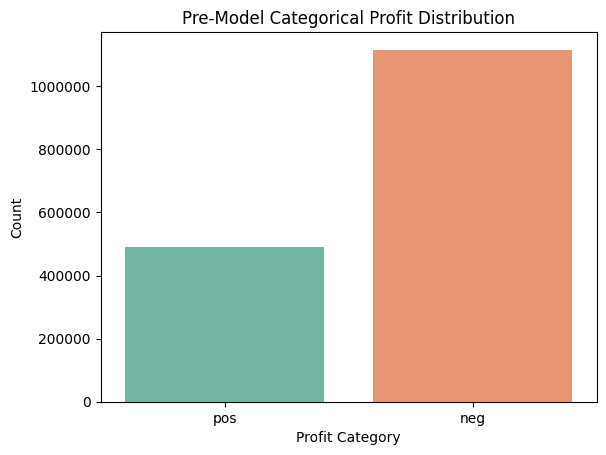

In [7]:
sns.countplot(x="profit_cat", data=data, palette="Set2")
plt.title("Pre-Model Categorical Profit Distribution")
plt.xlabel("Profit Category")
plt.ylabel("Count")
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [8]:
print(f"min profit: {data["profit"].min()}")
print(f"max profit: {data["profit"].max()}")
print(f"mean profit: {data["profit"].mean()}")
print(f"median profit: {data["profit"].median()}")

min profit: -1930.500503540039
max profit: 441.199951171875
mean profit: -10.199771393118601
median profit: -3.2750030517577993


In [19]:
# complete number of entries after na were dropped
data_tot = data.shape[0]
# chosen range of -100 to 100 for profit
most_data = data[(data["profit"] > -100) & (data["profit"] < 100)]
# seeing how many entries were left
loss_out = data[data["profit"] <= -100]["profit"].count()
gain_out = data[data["profit"] >= 100]["profit"].count()
most_data_tot = most_data.shape[0]
print(f"total entries: {data_tot}")
print(f"total entries in range -100 to 100: {most_data_tot}")
print(f"total entries out of range -100 to 100: {loss_out + gain_out}")
print(f"percentage of outliers to total: {(loss_out + gain_out) / data_tot * 100:.2f}%")

pos_profit = data[data["profit"] > 0]["profit"]
neg_profit = data[data["profit"] < 0]["profit"]
pos_profit_count = pos_profit.count()
neg_profit_count = neg_profit.count()
profitable = pos_profit_count / data_tot
print(f"percent profitable: {profitable * 100:.2f}%")

# average profit * profitable % (.2337)
# average loss * (1 - profitable %)

total entries: 1605520
total entries in range -100 to 100: 1578093
total entries out of range -100 to 100: 27427
percentage of outliers to total: 1.71%
percent profitable: 30.52%


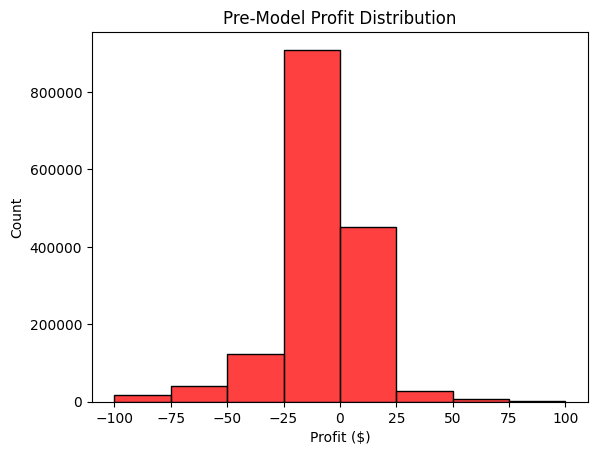

In [20]:
profit_col = most_data["profit"]
sns.histplot(profit_col, bins=8, color="red")
plt.ticklabel_format(style=None, axis='y')
plt.title("Pre-Model Profit Distribution")
plt.xlabel("Profit ($)")
plt.show()

In [ ]:
avg_profit = pos_profit.mean()
avg_loss = neg_profit.mean()
print(f"the average profit and loss are {avg_profit:.2f} and {avg_loss:.2f} respectively")
print(f"using the amount profitable, expected profits and losses are {avg_profit * profitable:.2f} and {avg_loss * (1 - profitable):.2f} respectively")
print(f"using equal probabilities, expected profits and losses are {avg_profit * .5:.2f} and {avg_loss * .5:.2f} respectively")
print(f"combining them using amount profitable, expected totals are {(avg_profit * profitable + avg_loss * (1 - profitable))/2:.2f}")
print(f"combining them using equal probabilities, expected totals are {(avg_profit * .5 + avg_loss * .5) / 2:.2f}")

the average profit and loss are 9.49 and -18.85 respectively
using the amount profitable, expected profits and losses are 2.90 and -13.10 respectively
using equal probabilities, expected profits and losses are 4.75 and -9.43 respectively
combining them using amount profitable, expected totals are -5.10
combining them using equal probabilities, expected totals are -2.34
